<a href="https://colab.research.google.com/github/Carol-salgadoG/Repositorio-AC/blob/main/Tarea_tortuga_de_la_copia_de_Julia_Colab_Notebook_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-03-28 01:56:02 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [2]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  479.710 ms (2 allocations: 32.00 MiB)


In [3]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


In [4]:
# Importamos el paquete "Pkg" para poder instalar paquetes
# Luego, instalamos el paquete "ThinkJulia"
using Pkg

Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

     Cloning git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Showoff ─────────────────── v0.3.2
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed x265_jll ────────────────── v3.5.0+0
   Installed FFMPEG ──────────────────── v0.3.0
   Installed IrrationalConstants ─────── v0.1.1
   Installed ColorTypes ──────────────── v0.9.1
   Installed TikzPictures ────────────── v3.4.2
   Installed Adapt ───────────────────── v3.6.1
   Installed libfdk_aac_jll ──────────── v2.0.2+0
   Installed GeometryTypes ───────────── v0.8.5
   Installed OffsetArrays ────────────── v1.12.9
   Installed Plots ───────────────────── v1.0.14
   Installed ImageCore ───────────────── v0.8.22
   Installed Graphite2_jll ───────────── v1.3.14+0
   Installed Pixman_jll ──────────────── v0.40.1+0
   Installed libass_jll ───────────

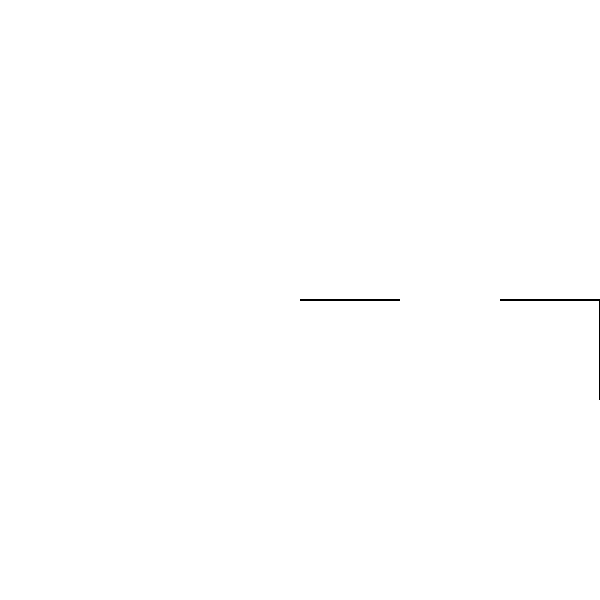

In [5]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d = 100

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    forward(🐢, d)
    penup(🐢)
    forward(🐢, d)
    pendown(🐢)
    forward(🐢, d)
    turn(🐢, 90)
    forward(🐢, d)
end

#=NOTA: '@svg' toma las instrucciones dentro del bloque 'begin' y genera un "gráfico
vectorizado escalable" (o svg, por sus siglas en inglés) con ellas, que luego Jupyter
nos muestra.=#

**Ejercicio** Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia cada una con 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)


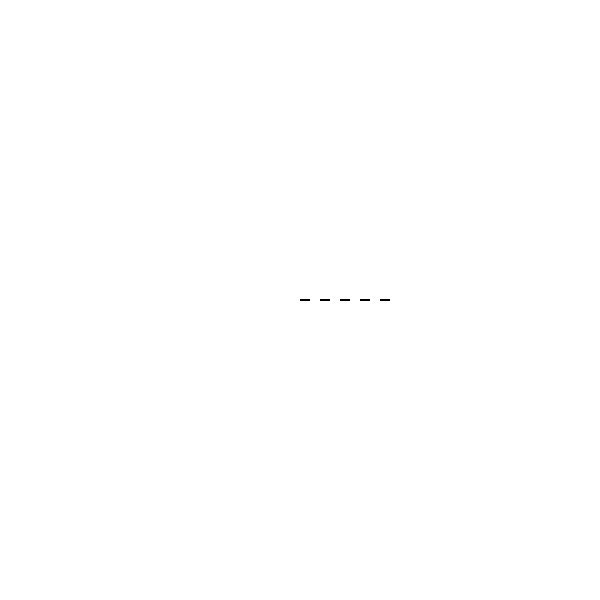

In [7]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano.
🐢 = Turtle()

d = 10

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
forward(🐢, d)   #Crea la primera linea de 10 unidades de distancia.
  penup(🐢)      #Levanta la pluma.
forward(🐢, d)   #Se separa a una distancia de 10 unidades.
  pendown(🐢)    #Baja la pluma.
forward(🐢, d)   #Se crea la segunda linea de 10 unidades de distancia.
  penup(🐢)      #Levanta la pluma.
forward(🐢, d)   #Se separa a una distancia de 10 unidades.
  pendown(🐢)    #Se baja la pluma para volver a marcar la linea.
forward(🐢, d)   #Se crea la tercera linea de 10 unidades de distancia.
  penup(🐢)      #Levanta la pluma.
forward(🐢, d)   #Se separa una distancia de 10 unidades.
  pendown(🐢)    #Se baja la pluma para volver a marcar la linea.
forward(🐢, d)   #Se crea la cuarta linea de 10 unidades de distancia.
  penup(🐢)      #Levanta la pluma.
forward(🐢, d)   #Se separa una distancia de 10 unidades.
  pendown(🐢)    #Se baja la pluma.
forward(🐢, d)   #Crea la quinta linea de 10 unidades de distancia.
end

**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo `for` o `while`.

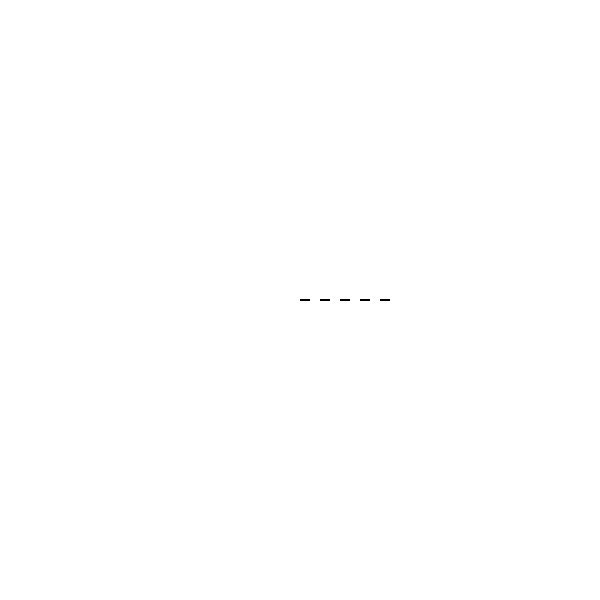

In [8]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano.
🐢 = Turtle()

d = 10
a = 0

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin

for a in 1:5   #El ciclo se va a repitir 5 veces

forward(🐢, d)  #Se crea una linea de 10 unidades de distancia.
  penup(🐢)     #Levanta la pluma.
forward(🐢, d)  #Se separa una distancia de 10 unidades.
  pendown(🐢)   #Baja la pluma.

  end
end

**Ejercicio** Haz un programa que tome tres parámetros `n`, `d1` y `d2` (los cuales puedes definir como variables en la misma celda) y dibuje `n` líneas de longitud `d1` con una distancia de separación `d2` entre ellas utilizando un ciclo `for` o `while`.

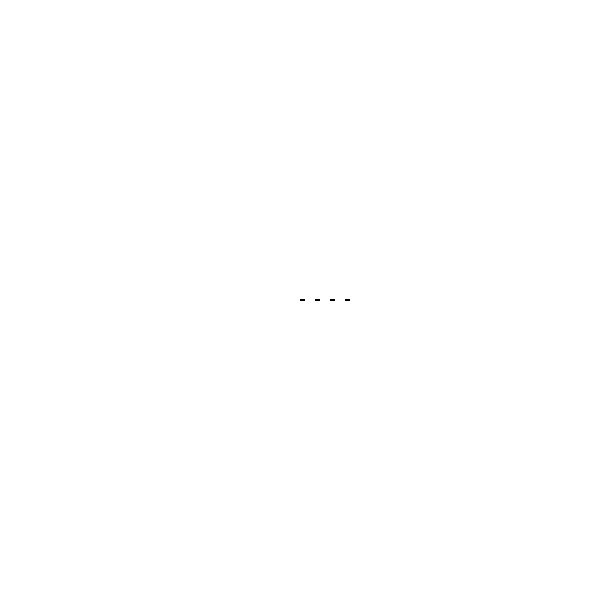

In [9]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano.
🐢 = Turtle()

n = 4         #Definimos la variable n que es el número de líneas.
d1 = 5        #Definimos la variable d1 que es la longitud de las líneas.
d2 = 10       #Definimos la variable d2 que es la separación de las líneas.

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin

for a in 1:n     #Empieza el clico desde 1 hasta el valor de n.

forward(🐢, d1)  #Se crea una línea con una distancia d1.
  penup(🐢)      #Se levanta la pluma.
forward(🐢, d2)  #Se separa una distancia de d2.
  pendown(🐢)    #Baja la pluma.

  end
end

**Ejercicio** Haz un programa que dibuje un triángulo equilátero de lado `d`.

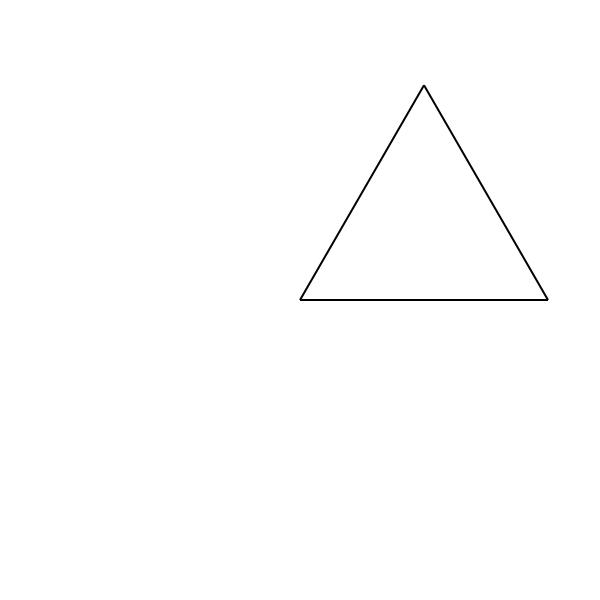

In [14]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano.
🐢 = Turtle()

d = 248

#Como el triangulo equilatero tiene 60° en cada uno de sus angulos internos, tenemos:
# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
forward(🐢, d)       #Se crea la base del triangulo, con distancia d.
 turn(🐢, -120)      #Giramos la tortuga -120° para que los angulos interiores tengan 60°.
forward(🐢, d)       #Se crea el lado derecho del triangulo a la distancia d.
  turn(🐢, -120)     #Giramos la tortuga -120° para tener otro angulo de 60°.
forward(🐢, d)       #Se crea el lado izquierdo del trangulo, avanza la distancia d y llega al origen del plano
end

**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros `n` y `d` y dibuje un polígono regular de `n` lados de longitud `d` utilizando un ciclo `for` o `while`.

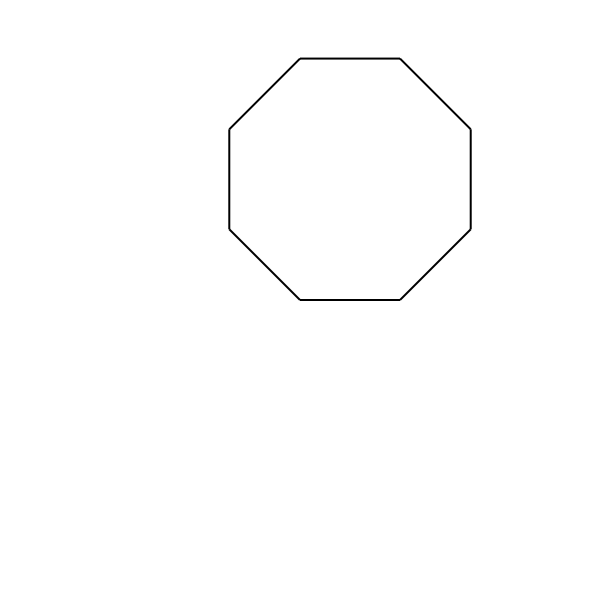

In [19]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano.
🐢 = Turtle()

n = 8                                    #Es la cantidad de lados de la figura.
d = 100                                  #Es la distancia de cada lado.

Angulo = (180) - (((n - 2) * 180)/ (n))  #Vemos cuanto angulo externo va a aumentar por cada lado.

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
for a in 1:n

forward(🐢, d)                           #Se crea una linea con la distancia d.
turn(🐢, -Angulo)                        #Giramos la tortuga el negativo del angulo externo.

  end
end

### Tortugas y fractales

Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga.

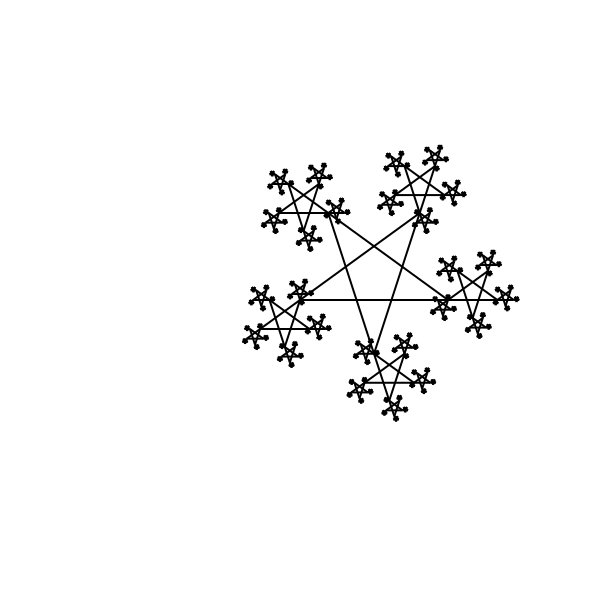

In [23]:
using ThinkJulia

function estrella(tort,dist)
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 148

@svg estrella(🐢,d)

**Ejercicio** Crea un fractal con un ciclo recursivo.

In [2]:
using ThinkJulia

function corazon(tort,dist)
    if dist <= 2
        return
    else
        for i in 1:11
            forward(tort,dist)
            corazon(tort,dist/2)
            turn(tort,84)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 20

@svg corazon(🐢,d)

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />